In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed.csv')

In [3]:
df.sample(5)

,created_at,hashtags,id,lang,retweet_count,source,text,user_location,user_verified,cleaned_tweet,Subjectivity,Polarity,Sentiment,SuppUkraine,CompanyLeft,SuppRussia
1648570,2022-03-14 22:45:09,NaN,1503502523046502400,fr,1.0,"el=""nofollow"">Echobox",Cinéma | Le futur procès de Kiev? https://t.c...,CA,True,cinéma le futur procès de kiev,0.0000,0.0000,Neutral,no,Not Given,no
410724,2022-03-28 02:27:33,NaN,1508269534406488064,en,0.0,WebApp,@jimmyiiconic I think that means Putin is the ...,NaN,False,jimmyiiconic think mean putin worst president ...,0.5775,-0.2025,Negative,no,shell,no
936622,2022-03-22 18:27:50,Russian Kyiv,1506336866613694464,en,0.0,iPhone,#Russian troops forced out of #Kyiv https://t....,Everywhere,False,russian troop forced kyiv,0.1000,-0.1500,Negative,no,Not Given,no
670867,2022-03-25 19:17:25,Minacciaredimorte UkraineCrisis Draghi occupar...,1507436508629843971,it,0.0,Android,Fai che nessuno veda conferenza tenuta da Drag...,Europe🇪🇺,False,fai che nessuno veda conferenza tenuta da drag...,0.0000,0.0000,Neutral,no,Not Given,no
164898,2022-03-31 07:27:32,NaN,1509432188533673984,en,0.0,Android,@Paiatine_ @TshaksO @EmbassyofRussia @mfa_russ...,NaN,False,paiatine tshakso embassyofrussia mfarussia pms...,0.6000,0.7000,Positive,no,Not Given,no


In [4]:
df.shape
#df=df[0:100000]

(2053226, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053226 entries, 0 to 2053225
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   created_at     object 
 1   hashtags       object 
 2   id             int64  
 3   lang           object 
 4   retweet_count  float64
 5   source         object 
 6   text           object 
 7   user_location  object 
 8   user_verified  bool   
 9   cleaned_tweet  object 
 10  Subjectivity   float64
 11  Polarity       float64
 12  Sentiment      object 
 13  SuppUkraine    object 
 14  CompanyLeft    object 
 15  SuppRussia     object 
dtypes: bool(1), float64(3), int64(1), object(11)
memory usage: 236.9+ MB


# a) Data Cleaning

In [6]:
# drop last 3 cols
df.drop(columns=['hashtags','created_at','id','lang',"retweet_count","source",'user_location','CompanyLeft','SuppRussia','user_verified','Sentiment',"Subjectivity"],inplace=True)

In [7]:
df.sample(4)

,text,cleaned_tweet,Polarity,SuppUkraine
541645,Scientificamente parlando non vi è mai capitat...,scientificamente parlando non vi è mai capitat...,0.0000,no
1409878,@MarekZakrzewski @Dpol_un In Ukraine THEY ARE ...,marekzakrzewski dpolun ukraine banned law inst...,0.0000,no
1916338,@napinba @georgegalloway @MandarinNYC616 @geor...,napinba georgegalloway mandarinnyc georgegallo...,-0.0625,no
1834023,"#Frieden &amp; #Gebet: Was sagt die #Bibel, #G...",frieden amp gebet sagt die bibel gott und jesu...,0.0000,no


In [8]:
# renaming the cols
df.rename(columns={'SuppUkraine':'target'},inplace=True)
df.sample(2)

,text,cleaned_tweet,Polarity,target
1470634,For anyone that thought FOX was legit. Here is...,anyone thought fox legit proof,0.0,no
1587567,@madkissTM @LaurenceTobias1 @lapatina_ I’m not...,madkisstm laurencetobias lapatina i’m defendin...,-0.3,no


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
# missing values
df=df[df["cleaned_tweet"].notna()]
df.isnull().sum()

text             0
cleaned_tweet    0
Polarity         0
target           0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

0

In [13]:
df.shape

(2027545, 4)

# b) EDA

In [14]:
df['target'].value_counts()

0    2001972
1      25573
Name: target, dtype: int64

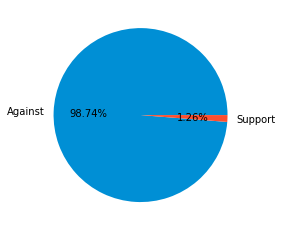

In [15]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
plt.pie(df['target'].value_counts(), labels=['Against','Support'],autopct="%0.2f%%")
plt.show()

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/prkskrs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_characters'] = df['text'].apply(len)

In [18]:
df.head()

,text,cleaned_tweet,Polarity,target,num_characters
0,@newsbusters It's because Trump is the head of...,newsbusters trump head republican party idiot ...,-0.800,0,135
1,Ukraine Russia conflict highlights that geogra...,ukraine russia conflict highlight geography ma...,0.125,0,278
2,@Puno_de_hierro so to kill handful of people i...,punodehierro kill handful people worth invadin...,0.050,0,101
3,"Union ministers Hardeep Puri,Jyotiraditya Scin...",union minister hardeep purijyotiraditya scindi...,0.000,0,141
4,BREAKING: President Putin orders nuclear deter...,breaking president putin order nuclear deterre...,0.080,0,170


In [19]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df.head()

,text,cleaned_tweet,Polarity,target,num_characters,num_words
0,@newsbusters It's because Trump is the head of...,newsbusters trump head republican party idiot ...,-0.800,0,135,26
1,Ukraine Russia conflict highlights that geogra...,ukraine russia conflict highlight geography ma...,0.125,0,278,53
2,@Puno_de_hierro so to kill handful of people i...,punodehierro kill handful people worth invadin...,0.050,0,101,16
3,"Union ministers Hardeep Puri,Jyotiraditya Scin...",union minister hardeep purijyotiraditya scindi...,0.000,0,141,26
4,BREAKING: President Putin orders nuclear deter...,breaking president putin order nuclear deterre...,0.080,0,170,29


In [21]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,text,cleaned_tweet,Polarity,target,num_characters,num_words,num_sentences
0,@newsbusters It's because Trump is the head of...,newsbusters trump head republican party idiot ...,-0.800,0,135,26,1
1,Ukraine Russia conflict highlights that geogra...,ukraine russia conflict highlight geography ma...,0.125,0,278,53,3
2,@Puno_de_hierro so to kill handful of people i...,punodehierro kill handful people worth invadin...,0.050,0,101,16,1
3,"Union ministers Hardeep Puri,Jyotiraditya Scin...",union minister hardeep purijyotiraditya scindi...,0.000,0,141,26,1
4,BREAKING: President Putin orders nuclear deter...,breaking president putin order nuclear deterre...,0.080,0,170,29,2


In [23]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.027545e+06,2.027545e+06,2.027545e+06
mean,1.704166e+02,3.120559e+01,2.140452e+00
std,8.963977e+01,1.766769e+01,1.309814e+00
min,2.000000e+00,1.000000e+00,1.000000e+00
25%,9.500000e+01,1.600000e+01,1.000000e+00
50%,1.590000e+02,2.900000e+01,2.000000e+00
75%,2.540000e+02,4.600000e+01,3.000000e+00
max,1.024000e+03,2.420000e+02,4.700000e+01


In [24]:
# Not Support
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.001972e+06,2.001972e+06,2.001972e+06
mean,1.697204e+02,3.107117e+01,2.133651e+00
std,8.959926e+01,1.766078e+01,1.306684e+00
min,2.000000e+00,1.000000e+00,1.000000e+00
25%,9.500000e+01,1.600000e+01,1.000000e+00
50%,1.580000e+02,2.900000e+01,2.000000e+00
75%,2.520000e+02,4.600000e+01,3.000000e+00
max,1.024000e+03,2.420000e+02,4.700000e+01


In [25]:
# Support
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,25573.000000,25573.00000,25573.000000
mean,224.911352,41.72862,2.672858
std,74.809101,14.80313,1.438683
min,18.000000,3.00000,1.000000
25%,169.000000,31.00000,2.000000
50%,246.000000,45.00000,2.000000
75%,282.000000,53.00000,3.000000
max,973.000000,163.00000,19.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

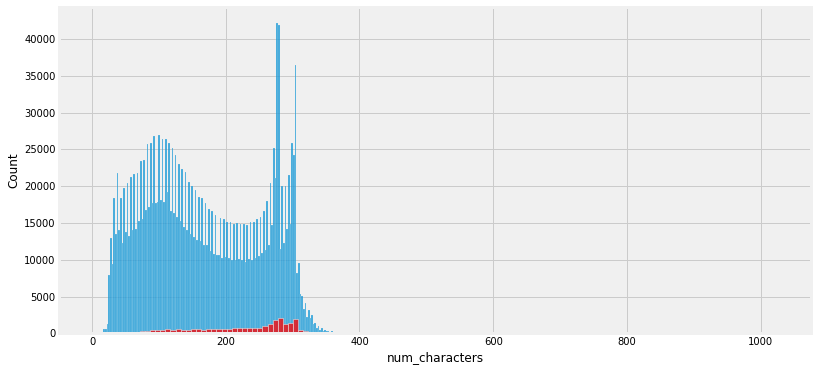

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

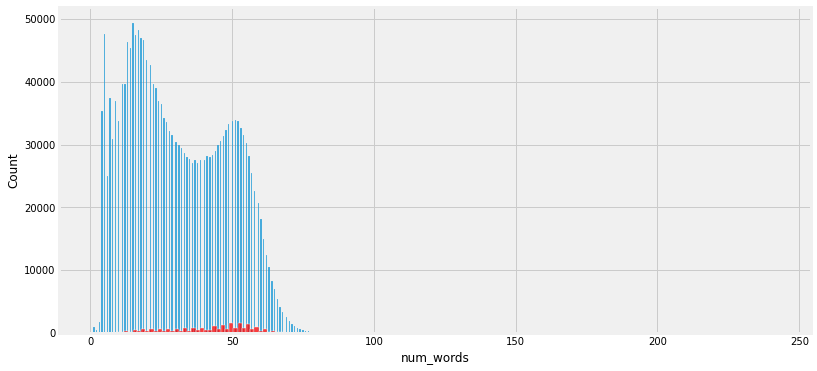

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

In [28]:
# sns.pairplot(df,hue='target')

<AxesSubplot:>

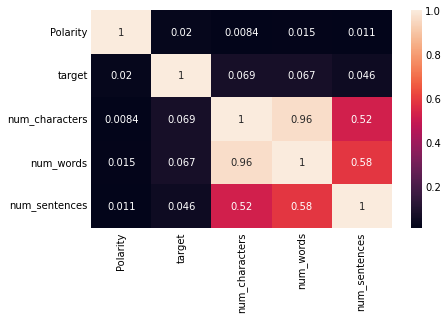

In [29]:
sns.heatmap(df.corr(),annot=True)

# c) Data Preprocessing

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
supp = wc.generate(df[df['target'] == 1]['cleaned_tweet'].str.cat(sep=" "))

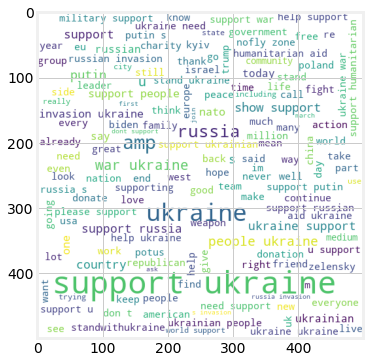

In [32]:
plt.figure(figsize=(15,6))
plt.style.use("fivethirtyeight")
plt.imshow(supp)

In [33]:
df.head()

,text,cleaned_tweet,Polarity,target,num_characters,num_words,num_sentences
0,@newsbusters It's because Trump is the head of...,newsbusters trump head republican party idiot ...,-0.800,0,135,26,1
1,Ukraine Russia conflict highlights that geogra...,ukraine russia conflict highlight geography ma...,0.125,0,278,53,3
2,@Puno_de_hierro so to kill handful of people i...,punodehierro kill handful people worth invadin...,0.050,0,101,16,1
3,"Union ministers Hardeep Puri,Jyotiraditya Scin...",union minister hardeep purijyotiraditya scindi...,0.000,0,141,26,1
4,BREAKING: President Putin orders nuclear deter...,breaking president putin order nuclear deterre...,0.080,0,170,29,2


In [34]:
support_corpus = []
for msg in df[df['target'] == 1]['cleaned_tweet'].tolist():
    for word in msg.split():
        support_corpus.append(word)

In [35]:
len(support_corpus)

498193

/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


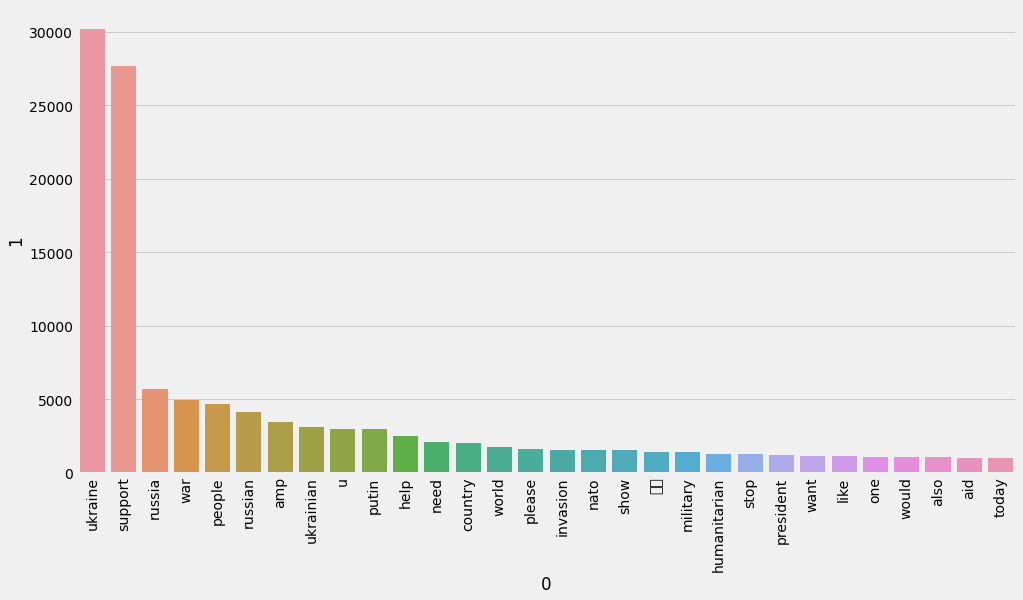

In [36]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,8))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(support_corpus).most_common(30))[0],pd.DataFrame(Counter(support_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()



In [37]:
notsupport_corpus = []
for msg in df[df['target'] == 0]['cleaned_tweet'].tolist():
    for word in msg.split():
        notsupport_corpus.append(word)

In [38]:
# df.to_csv("model.csv",index=False)

In [2]:
import pandas as pd
df=pd.read_csv("model.csv")

In [16]:
a=df[df["target"]==1]
b=df[df["target"]==0]
b=b[0:200000]
frames = [a, b]
result = pd.concat(frames)
df=result

# d) Model Building

In [17]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [18]:
X = tfidf.fit_transform(df['cleaned_tweet']).toarray()

In [19]:
X.shape

(85573, 3000)

In [20]:
y = df['target'].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [24]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [25]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.49517966695880805
0.3699606503823595


In [26]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8566754309085597
0.8007619901389511


In [27]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.992638036809816
0.9802568525972781


In [28]:
# bnb perfomed best as per precision score because our data is imbalanced

In [31]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))